# Importing necessary libraries 

In [35]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from matplotlib import style
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Importing the dataset

In [36]:
df = pd.read_csv("dataset/compressed_news.csv")

In [37]:
df.head()

,Unnamed: 0,title,text,label
0,9957,"American Dream, Revisited",Will Trump pull a Brexit times ten? What would...,FAKE
1,7596,Clintons Are Under Multiple FBI Investigations...,Clintons Are Under Multiple FBI Investigations...,FAKE
2,8905,The FBI Can’t Actually Investigate a Candidate...,Dispatches from Eric Zuesse This piece is cros...,FAKE
3,8752,Confirmed: Public overwhelmingly (10-to-1) say...,Print \n[Ed. – Every now and then the facade c...,FAKE
4,7804,Nanny In Jail After Force Feeding Baby To Death,Nanny In Jail After Force Feeding Baby To Deat...,FAKE


In [38]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    FAKE
3    FAKE
4    FAKE
Name: label, dtype: object

# Dividing the dataset into Training set and Testing set

In [39]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size = 0.25, random_state = 9)

In [40]:
print('Size of x_train:',(x_train.shape))
print('Size of y_train:',(y_train.shape))
print('Size of x_test:',(x_test.shape))
print('Size of y_test:',(y_test.shape))

Size of x_train: (950,)
Size of y_train: (950,)
Size of x_test: (317,)
Size of y_test: (317,)


# Optimizing for Accuracy

In [34]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [35]:
stopset=set(stopwords.words('english'))
vector=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stopset)

In [36]:
vector.fit(df)

TfidfVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                strip_accents='ascii')

In [39]:
y=df.label
x=vector.fit_transform(df.title)

In [40]:
print(x.shape)
print(y.shape)

(1267, 4054)
(1267,)


In [43]:
print(x[:5])

  (0, 3048)	0.6550180651182695
  (0, 1100)	0.5940920127226775
  (0, 192)	0.46691114228280794
  (1, 3475)	0.4536028421505328
  (1, 147)	0.4289223648005788
  (1, 1863)	0.4536028421505328
  (1, 1345)	0.28876505385676937
  (1, 2368)	0.4536028421505328
  (1, 709)	0.3396670920531643
  (2, 708)	0.2179041078802131
  (2, 1689)	0.23656773298177494
  (2, 567)	0.43552571324212824
  (2, 1861)	0.49658491417140377
  (2, 119)	0.4131040896369699
  (2, 569)	0.43552571324212824
  (2, 1345)	0.31612758157625703
  (3, 3984)	0.32019604957576925
  (3, 3907)	0.3431327432194952
  (3, 2244)	0.2912992330473291
  (3, 3155)	0.25649889078441773
  (3, 2)	0.35940658634598804
  (3, 2562)	0.4215538167599328
  (3, 2843)	0.35068646013175725
  (3, 781)	0.39861712311620684
  (3, 1689)	0.2008237220156268
  (4, 923)	0.3649099239882559
  (4, 311)	0.3729430432948535
  (4, 1359)	0.44830805066138724
  (4, 1441)	0.3822165989577343
  (4, 1903)	0.42391566229429994
  (4, 2389)	0.44830805066138724


# Visualization of training data

Text(0.5, 1.0, 'Distribution of Content')

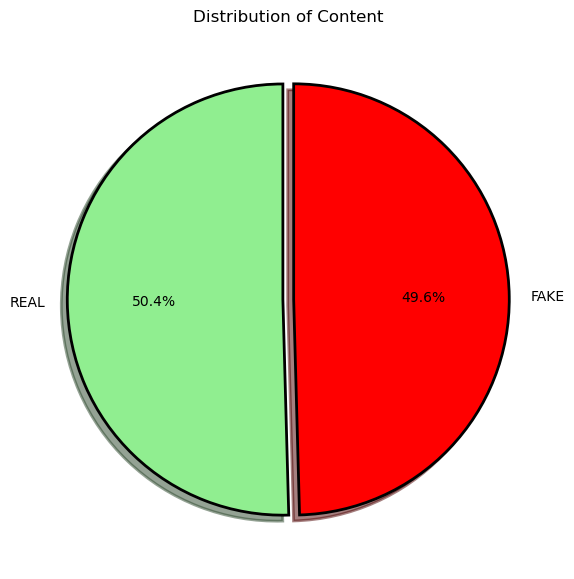

In [14]:
fig = plt.figure(figsize=(7,7))
colors = ('lightgreen','red')
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['label'].value_counts()
explode = (0.025,0.025)
tags.plot(kind = 'pie',autopct='%1.1f%%',shadow=True,colors=colors,
         startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title('Distribution of Content')

In [27]:
real_titles = df[df.label == 'REAL']
text = ' '.join([word for word in real_titles['title']])

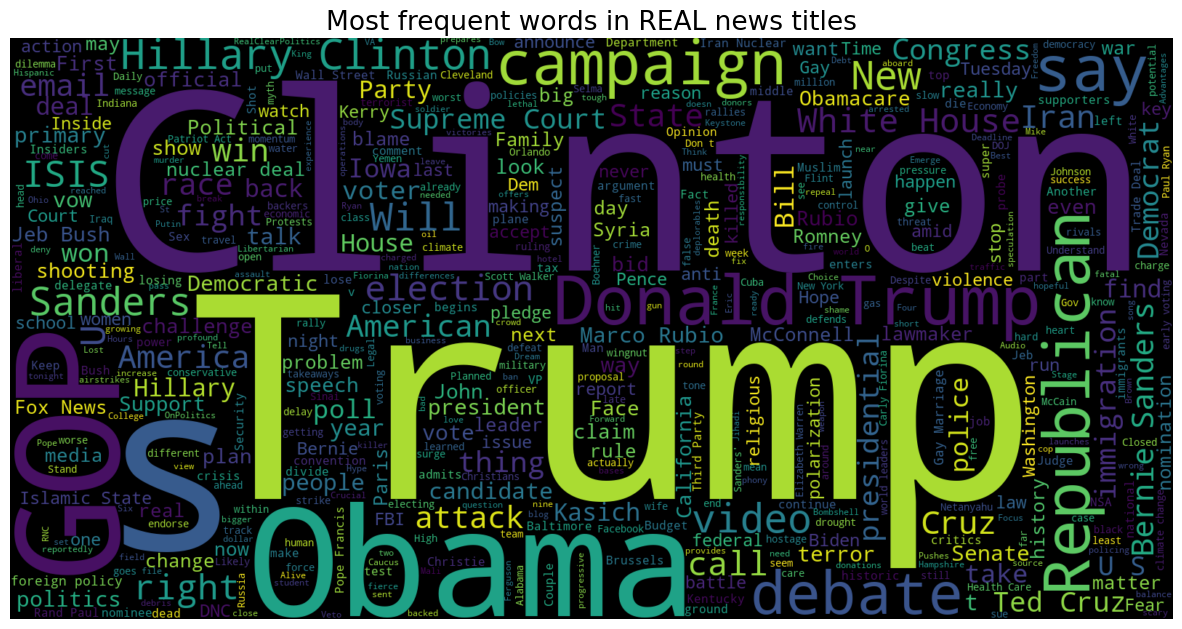

In [28]:
#word cloud for the REAL titles
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in REAL news titles', fontsize=19)
plt.show()

In [29]:
real_text = df[df.label == 'REAL']
text = ' '.join([word for word in real_text['text']])

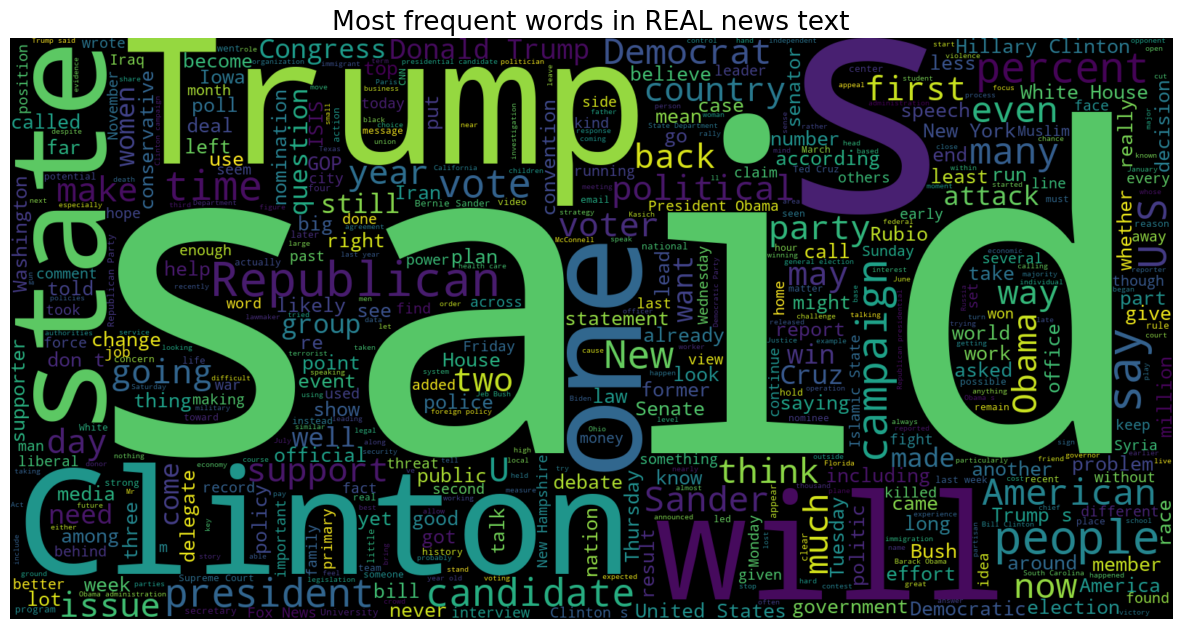

In [30]:
#word cloud for the REAL text
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in REAL news text', fontsize=19)
plt.show()

In [31]:
fake_titles = df[df.label == 'REAL']
text = ' '.join([word for word in fake_titles['title']])

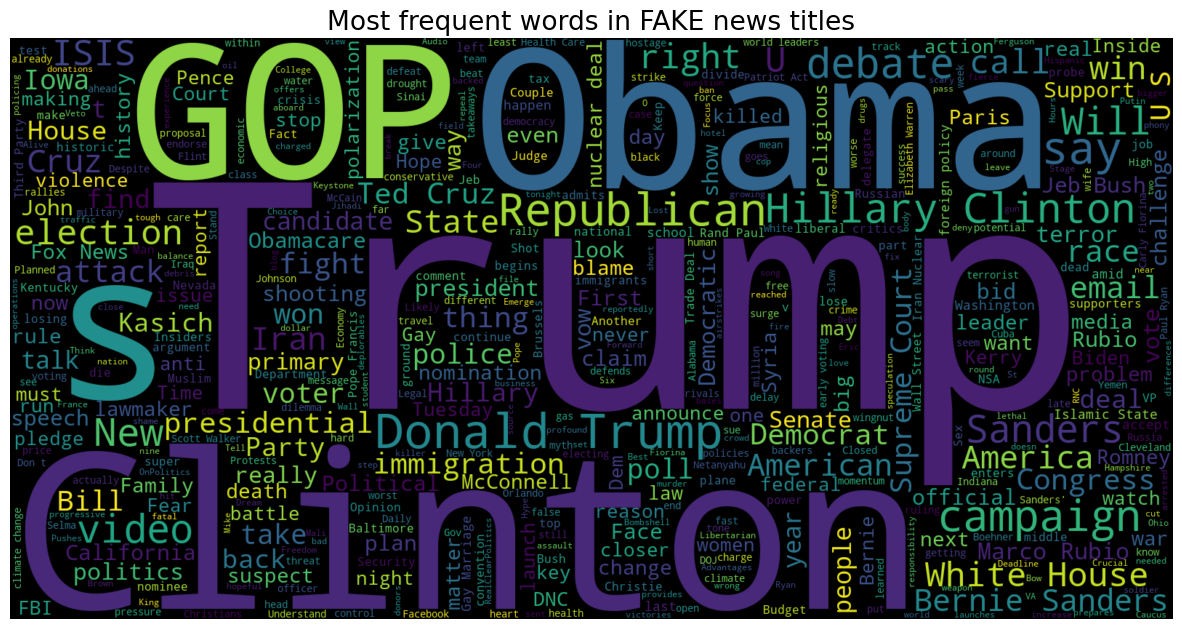

In [32]:
#word cloud for the FAKE titles
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in FAKE news titles', fontsize=19)
plt.show()

In [33]:
fake_text = df[df.label == 'REAL']
text = ' '.join([word for word in real_titles['text']])

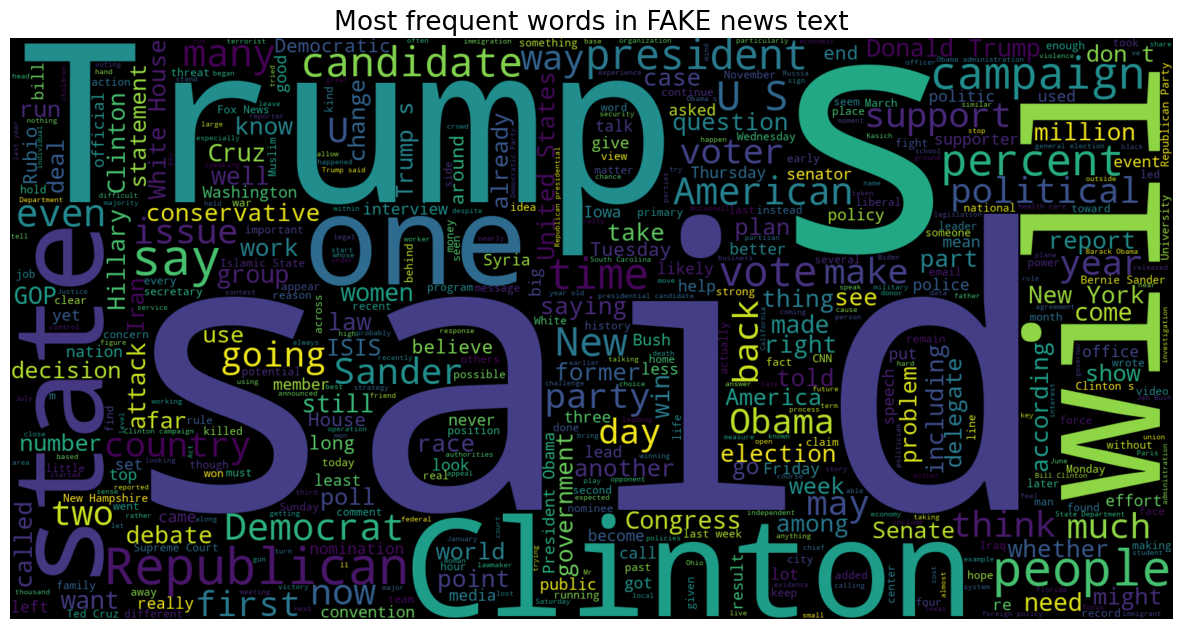

In [34]:
#word cloud for the FAKE text
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in FAKE news text', fontsize=19)
plt.show()

# Support Vector Machine

In [7]:
svc = LinearSVC()
svc.fit(tfidf_train, y_train)

LinearSVC()

In [8]:
y_pred_SVM = svc.predict(tfidf_test)
score_SVM = accuracy_score(y_test, y_pred_SVM)
print(f'Accuracy: {round(score_SVM*100,2)}%')

Accuracy: 93.69%


In [9]:
y_pred_SVM

array(['FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL',
       'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE',
       'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'REAL',
       'REAL', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'REAL', 'FAKE',
       'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE',
       'FAKE', 'REAL', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE',
       'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL',
       'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE',
       'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'REAL', 'REAL',
       'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL',
       'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL',
       'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE',
      

In [10]:
print(confusion_matrix(y_test, y_pred_SVM))
print('\n')
print(classification_report(y_test, y_pred_SVM))

[[144   6]
 [ 14 153]]


              precision    recall  f1-score   support

        FAKE       0.91      0.96      0.94       150
        REAL       0.96      0.92      0.94       167

    accuracy                           0.94       317
   macro avg       0.94      0.94      0.94       317
weighted avg       0.94      0.94      0.94       317



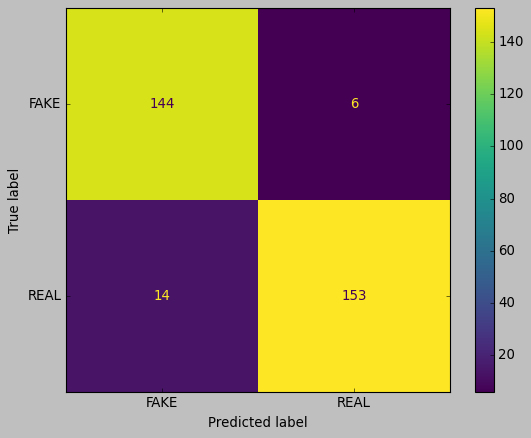

In [11]:
style.use('classic')
cm = confusion_matrix(y_test, y_pred_SVM, labels = svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svc.classes_)
disp.plot()

# Logistic Regression

In [12]:
model = LogisticRegression(solver = 'liblinear', random_state = 0)
model.fit(tfidf_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [13]:
y_pred_LR = model.predict(tfidf_test)
score_LR = accuracy_score(y_test, y_pred_LR)
print(f'Accuracy: {round(score_LR*100,2)}%')

Accuracy: 91.8%


In [14]:
print(confusion_matrix(y_test, y_pred_LR))
print('\n')
print(classification_report(y_test, y_pred_LR))

[[145   5]
 [ 21 146]]


              precision    recall  f1-score   support

        FAKE       0.87      0.97      0.92       150
        REAL       0.97      0.87      0.92       167

    accuracy                           0.92       317
   macro avg       0.92      0.92      0.92       317
weighted avg       0.92      0.92      0.92       317



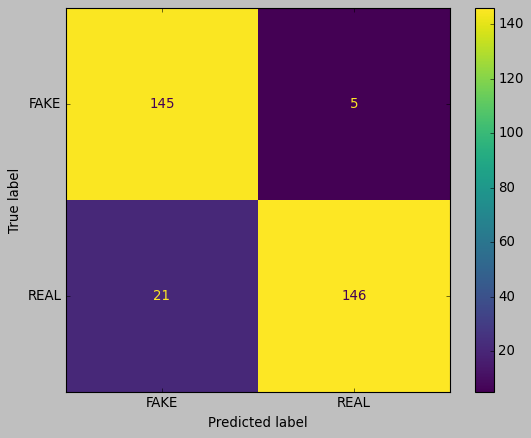

In [15]:
style.use('classic')
cm = confusion_matrix(y_test, y_pred_LR, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot()

# Decision Tree

In [16]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classifier.fit(tfidf_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
y_pred_DT = classifier.predict(tfidf_test)
score_DT = accuracy_score(y_test, y_pred_DT)
print(f'Accuracy: {round(score_DT*100,2)}%')

Accuracy: 79.18%


In [18]:
print(confusion_matrix(y_test, y_pred_DT))
print('\n')
print(classification_report(y_test, y_pred_DT))

[[116  34]
 [ 32 135]]


              precision    recall  f1-score   support

        FAKE       0.78      0.77      0.78       150
        REAL       0.80      0.81      0.80       167

    accuracy                           0.79       317
   macro avg       0.79      0.79      0.79       317
weighted avg       0.79      0.79      0.79       317



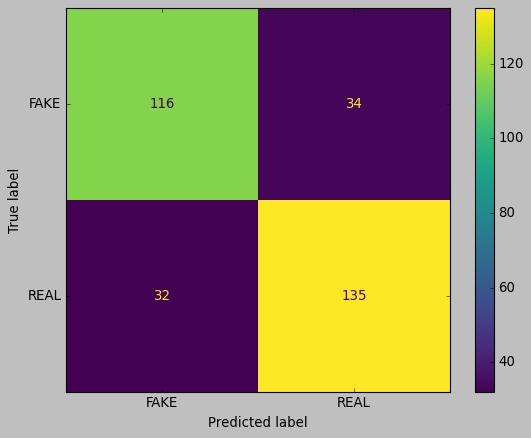

In [19]:
style.use('classic')
cm = confusion_matrix(y_test, y_pred_DT, labels = classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()